[View in Colaboratory](https://colab.research.google.com/github/MaharshiYeluri01/SpeechRecognition/blob/master/SpeechRec_p2.ipynb)

Transforming Audio Signals into frequency domain

In [0]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()


Saving input_freq.wav to input_freq.wav


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "input_freq.wav" with length 6546 bytes


In [0]:
sampling_freq, audio = wavfile.read('input_read.wav')

In [0]:
audio = audio / (2.**15)

len_audio = len(audio)

In [25]:
len_audio

132300

In [0]:
transformed_signal = np.fft.fft(audio)

In [9]:
transformed_signal

array([ 1.88909363e+04 +0.j        ,  4.48564088e+01+11.65176263j,
       -2.45854576e+01-29.33893854j, ...,  2.32631353e+00+17.79559604j,
       -2.45854576e+01+29.33893854j,  4.48564088e+01-11.65176263j])

In [0]:
half_length = np.ceil((len_audio + 1) / 2.0)


In [0]:
half_length=int(half_length)

In [14]:
half_length

66151

In [0]:
transformed_signal = abs(transformed_signal[0:half_length])

In [20]:
transformed_signal

array([2.03885940e-02, 1.22711843e-07, 8.37110074e-08, ...,
       3.70042145e-08, 9.86328419e-09, 4.19318663e-08])

In [0]:
transformed_signal /= float(len_audio)

In [0]:
transformed_signal **= 2

In [0]:
len_ts = len(transformed_signal)

# Take care of even/odd cases
if len_audio % 2:
    transformed_signal[1:len_ts] *= 2
else:
    transformed_signal[1:len_ts-1] *= 2

# Extract power in dB
power = 10 * np.log10(transformed_signal)

In [22]:
power

array([-16.90612722, -66.10083525, -67.76187436, ..., -71.30718815,
       -77.04948458, -73.77455808])

In [0]:
x_values = np.arange(0, half_length, 1) * (sampling_freq / len_audio) / 1000.0

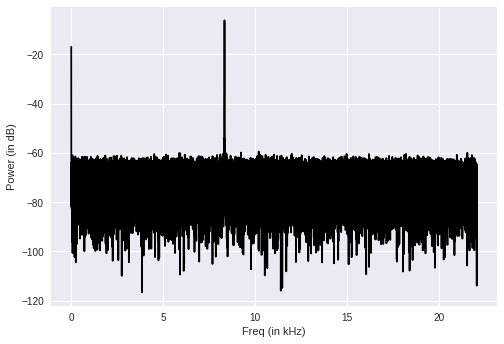

In [29]:
plt.figure()
plt.plot(x_values, power, color='black')
plt.xlabel('Freq (in kHz)')
plt.ylabel('Power (in dB)')
plt.show()

In [30]:
x_values

array([0.00000000e+00, 3.33333333e-04, 6.66666667e-04, ...,
       2.20493333e+01, 2.20496667e+01, 2.20500000e+01])